
# CSCE633 Fall 2022 (Total 100 pts)

**Machine Learning**

**Homework 4**

Instructor: Yoonsuck Choe

Nov 4, 2022


---

**Student name: ** Chapalgaonkar, Sankalp


---

# Common instructions (Read carefully)

**Submission:**

1. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
2. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markup language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.

**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to good drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```

# Section I: Dimensionality Reduction

**Problem 1 (Written: 10pts):** 

Consider the data sets below: Data set 1 = Spiral data, Data set 2 = Point cloud data, and Data set 3 = simple data. You can plot the data first. 
- Plot the first column in the data against the second column
``` D1[:,0] , D1[:,1] ```
- Make sure you use aspect ratio of 1 when plotting, so that the x- and y-axis have the same scale.
```
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(....)
```
- Use "." for plotting style:  
```plt.plot(...,".") ```

(1) Which of the three data sets D1, D2, and D3 would be the most appropriate for PCA analysis, in terms of dimensionality reduction (2D to 1D)? Explain why.

(2) Which of the three data sets D1, D2, and D3 would be the least appropriate for  PCA analysis, in terms of dimensionality reduction (2D to 1D)? Explain why.

**Hint:** 
- Although the data are not labled into different classes, you may be able to "see" two possible groups of points in each data set. When you use  PCA to project all the data points to the PCA space (using the 1st and 2nd principal component vectors), would you be able to distinguish the two groups, just based on the 1st principal component axis? 
- Also, you can think about the variance in the original data (along the two axes) and the variance in the resulting projection (along the two principal component axes). 



**Answer:**

Fill out the code cell below for the plot, and enter your answer here:

(1) D3 would be the best option for PCA analysis dimensionality reduction (from two dmensions to 1 dimension). With respect to D3, the perpendicular axis has a lower variance than the diagonal axis. Hence based on based on the first principal component axis, we can confirm that D3 would be the most appropriate data for PCA ama;ysis in terms of dimensionality reduction.

(2) In D1 dataset (spiral one), the data is very evenly situated and hence it becomes very difficult to decide which access should be the primary component axis for principal componant analysis. For Spiral datasets we usually use manifold learning for dimensionality reduction as manifold learning uses geodesic distance instead of euclidean distance.


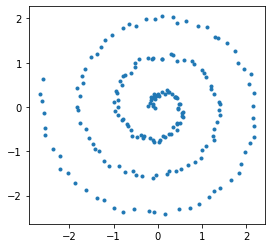

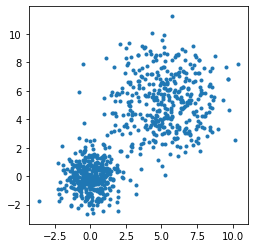

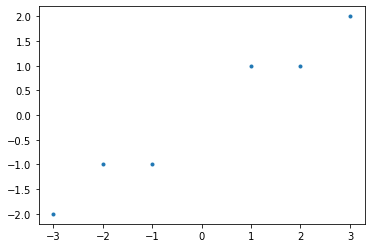

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#--------------------
def spiral_1(t):
#--------------------
  '''
  parametric curve of a spiral : clockwise
  '''
  rand_factor = 1.0

  dat   = np.array([(t+1)*np.sin(t+5), (t+1)*np.cos(t+5)])
  noise = np.random.rand(2,len(dat[0,:]))*rand_factor
  return (dat+noise-0.5)/7.5


"""
Data set 1 : D1 = spiral like data

- This is a variation on the parametric plot for a circle [cos(t), sin(t)], with a gradually increasing radius. 
"""

# data set 1 [x, y]

t = np.arange(0, 6*np.pi, 0.1)
D1 =  np.transpose(spiral_1(t))

# Plot it
# -- add your plotting code here
# plot
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(D1[:,0] , D1[:,1],'.')  
ax.set_aspect(1.0) # set aspect ratio to 1.0

"""
Data set 2 : D2 = point cloud data (normal distribution)
"""

x = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))
y = np.append(np.random.normal(0,1,400),   np.random.normal(5.3,2,400))

D2 = np.vstack((x,y)).T

# Plot it 
# -- add your plotting code here
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(D2[:,0] , D2[:,1],'.')  
ax.set_aspect(1.0) # set aspect ratio to 1.0

"""
Data set 3: D3 = simple data
"""

D3 = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# Plot it
# -- add your plotting code here : use aspect ratio 1 (see below)
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(D3[:,0] , D3[:,1],'.')  
ax.set_aspect(1.0) # set aspect ratio to 1.0


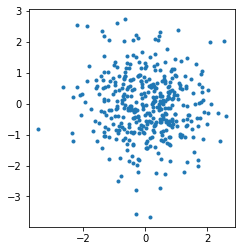

In [ ]:
# Example plotting code

# data 
x = np.random.normal(0,1,400)
y = np.random.normal(0,1,400)

# plot
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(x,y,'.')  
ax.set_aspect('equal') # set aspect ratio to 1.0

**Problem 2 (Program: 15pt)**

Use scikit learn's PCA package to analyze the data set from problem 1. Use the template below.

```
from sklearn.decomposition import PCA

X = .... # data (you can reuse D1, D2, D3 from above (Problem 1)

# plot X : X[:,0] against X[:,1]

pca = PCA(n_components=2)
pca.fit(X)
print(pca.singular_values_)

Z = pca.fit_transform(X)


# plot Z : Z[:,0] against Z[:,1]

```

For each of the three data sets D1, D2, D3: 

(1) [1pt] Plot the original data set (X). Fix aspect ratio to 1. 

(2) [1pt] Plot the projected data set (Z). Fix aspect ratio to 1. 

(3) [2pt] Compare the variance along the first and second principal component vectors (```pca.singular_values_```) for each data set.

- D1: 
- D2:
- D3: 

(4) [6pt] Comment on how these results relate to your answers in Problem 1. 





**Answer:**

Fill out the code in the code cell below, and enter your answer here: 

(1) Just refer to the code below. 

(2) Just refer to the code below.

(3) Following are the variance along the first and second principal component vectors respectively for all the three datasets

    D1: [15.7394149, 14.55217049]
    D2: [114.80783262, 42.84167522]
    D3: [6.30061232, 0.54980396]

(4)
* The variance of the first and second principal component axes is [15.7394149, 14.55217049]. Variance is large for both the primary axes and they are practically identical, thus it does not outperform the current axis. As a result, this shows that the data spread is insufficient for computing PCA.
* For D2 dataset, the variance of the first and second principal component axes is [114.80783262, 42.84167522]. This dataset has a significant variation in the first axis but a moderate variance in the second. However, it is far from the best example for computing PCA.
* For D3 dataset, the variance of the first and second principal component axes is [6.30061232, 0.54980396]. This dataset exhibits low variance at the first principle component axis but extremely low variance at the second principal component axis and is nearly comparable to 0, indicating the usage of that one axis since the variation is fully biased towards that primary axis. As a result, the D3 is the optimum choice for computing PCA.


Variance along the principal and secondary component axis for dataset D1 are:
[15.78354674 14.60317572]


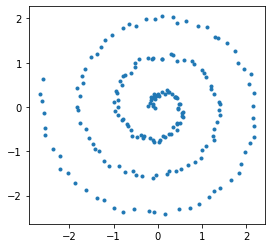

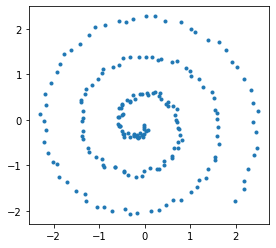

In [ ]:
"""
Write your PCA code here, and plot the original data and the projected data 
"""

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# X = np.array([[-1, -1], [1,1]]) # data (you can reuse D1, D2, D3 from above (Problem 1)

# IMPLEMENT THIS: plot the input X here : X[:,0] against X[:,1]
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(D1[:,0] , D1[:,1],'.')  
ax.set_aspect(1.0) # set aspect ratio to 1.0

# 1. set up with input dimension = 2
pca_d1 = PCA(n_components=2)
pca_d1.fit(D1)

print("Variance along the principal and secondary component axis for dataset D1 are:")
print(pca_d1.singular_values_)

Z = pca_d1.fit_transform(D1)

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(Z[:,0] , Z[:,1],'.') 
ax.set_aspect(1.0) # set aspect ratio to 1.0



Variance along the principal and secondary component axis for dataset D2 are:
[113.89569827  43.48665816]


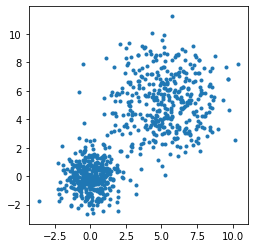

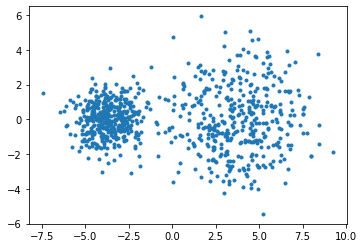

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Implementation for D2
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(D2[:,0] , D2[:,1],'.')  
ax.set_aspect(1.0) # set aspect ratio to 1.0

pca_d2 = PCA(n_components=2)

pca_d2.fit(D2)
print("Variance along the principal and secondary component axis for dataset D2 are:")
print(pca_d2.singular_values_)

Z2 = pca_d2.fit_transform(D2)

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(Z2[:,0] , Z2[:,1],'.')  
ax.set_aspect(1.0) # set aspect ratio to 1.0

Variance along the principal and secondary component axis for dataset D3 are:
[6.30061232 0.54980396]


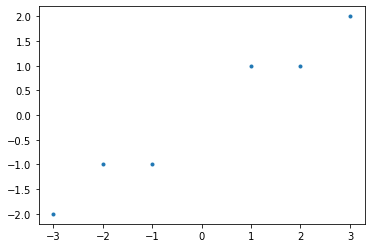

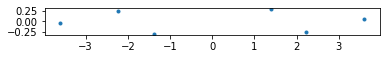

In [ ]:
import numpy as np
import matplotlib.pyplot as plt# Implementation for D3

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(D3[:,0] , D3[:,1],'.')  
ax.set_aspect(1.0) # set aspect ratio to 1.0

pca_d3 = PCA(n_components=2)

pca_d3.fit(D3)
print("Variance along the principal and secondary component axis for dataset D3 are:")
print(pca_d3.singular_values_)

Z3 = pca_d3.fit_transform(D3)

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(Z3[:,0] , Z3[:,1],'.')  
ax.set_aspect(1.0) # set aspect ratio to 1.0

**Problem 3 (Written: 15 pts):**

(1) Explain why manifold learning can effectively handle data like the data set D1 in Problem 1 (the spiral data). [5pt]

(2) For the spiral data (data set D1), what would be an appropriate $\epsilon$ value for use in ISOMAP? Give a specific value as your answer (e.g. $\epsilon = 2.5$), and explain your reasoning. **Hint:** By eyeballing the data, you can see that $\epsilon$ cannot be less than a certain value (graph will be disconnected), while it cannot be greater than a certain value (points across different parts of the spiral will be connected), in order to recover the manifold structure. Pick a number between these two bounds.  [10pt] 


**Answer:**

(1)
Manifold learning is a non-linear dimensionality reduction technique. When given a collection of data, PCA determines the directions with the maximum variance in the data as well as their relative importance. Consider the scenario where PCA is fed a set of three-dimensional points that are all located on a two-dimensional plane. PCA will produce a third vector that is orthogonal to the plane along with two vectors that span the plane. The two vectors that span the plane will be given a positive weight, but the third vector will have a weight of zero, since the data does not vary along that direction. When data is on or near a linear sub-space of the data set, PCA is most useful. With this kind of information, PCA will establish a foundation for the linear subspace and enable the removal of the unimportant characteristics.

We are projecting the data onto a low-dimensional surface using PCA. But because all of those surfaces are linear, this is restrictive. PCA will undoubtedly not work for datasets when the best representation is found on an oddly shaped surface. PCA wouldn't be particularly effective in the case of spiral datasets because it will search for a flat surface to explain this data. The lack of a planar surface is the issue, though. Consequently, we arrive at a less-than-ideal representation of the data. This issue is effectively resolved via manifold learning.

Euclidean distance is the shortest distance between two points in the space, whereas, Geodesic distance is the distance between two points following the shortest path along the manifold. Since Euclidean distance only takes into account numerical differences between the points, we must employ the geodesic distance in order to identify the manifold. It doesn't take the shape of the space into account. Geodesic distance, on the other hand, takes the nearby points into account while calculating the distance. Eucleadian distances (and hence the PCA) will not work for a dataset like D1 because it has a spiral structure, so we utilize manifold learning instead.

(2)
You can see from the data that 𝜖 cannot be less than 0.2 and cannot be greater than 0.6 in order to reconstruct the manifold structure for use in ISOMAP. As a result, choosing $=0.45$ would be a good option for ISOMAP. The explanation is depicted in the diagram that follows.

<img src="https://drive.google.com/uc?export=view&id=1xLtmgSyjxN3H1qBhK-XwXHZZsWwELpJy"> 

If epsilon is less than 0.2 then the datapoints in the neighborhood will not be connected and if epilon is more than 0.6, it will connect the points which lie on the different parts (other than neighbors). Here the value 0.2 should be included as we need to connect the neighbors. On the other hand the value 0.6 should be excluded as the points residing in two different parts (spiral lines) should not be connected to each other.



# Section II: Conditional Independence 

**Problem 4 (Written: 10pts)**

Consider three binary variables $a, b, c \in \{0,1\}$ having the
joint probability distribution given in the table below. Show by direct
evaluation that this distribution has the property that $a$ and $b$ are 
dependent, so that $P(a,b) \neq P(a)p(b)$, but that they become independent
when conditioned on $c$, so that $ P(a,b|c) = P(a|c)p(b|c)$ for both
$c=0$ and $c=1$ [adapted from C. M. Bishop, *Pattern Recognition and Machine Learning*, Springer, 2006].

> $a$ | $b$ | $c$ | P($a$,$b$,$c$)
> --- | --- | --- | ---
> 0 | 0 | 0 | 0.375 
> 0 | 0 | 1 | <strike>0.005</strike> 0.05 (typo fixed!)
> 0 | 1 | 0 | 0.041667 
> 0 | 1 | 1 | 0.075
> 1 | 0 | 0 | 0.075 
> 1 | 0 | 1 | 0.15
> 1 | 1 | 0 | 0.008333
> 1 | 1 | 1 | 0.225


**Answer:**

$$P(a=0) = 0.375+0.05+0.041667+0.075 = 0.541667$$
$$P(a=1) = 0.075+0.15+0.008333+0.225 = 0.458333$$
$$P(b=0) = 0.375+0.05+0.075+0.15 = 0.65$$
$$P(b=1) = 0.041667+0.075+0.008333+0.225 = 0.35$$

$$P(a=0, b=0) = 0.375+0.05 = 0.425$$
$$P(a=0, b=1) = 0.041667+0.075 = 0.116667$$
$$P(a=1, b=0) = 0.075+0.15 = 0.225$$
$$P(a=1, b=1) = 0.008333+0.225 = 0.233333$$

Tabulate your results in the following format:

> $a$ | $b$ | P($a$,$b$) | P($a$)P($b$)
> --- | --- | --- | ---
> 0 | 0 | p(a=0,b=0) = 0.425| 0.35208355
> 0 | 1 | p(a=0,b=1) = 0.116667 | 0.18958345
> 1 | 0 | p(a=1,b=0) = 0.225| 0.29791645
> 1 | 1 | p(a=1,b=1) = 0.233333| 0.16041655

As $P(a,b) \neq P(a)p(b)$, a and b are dependent

$$P(c=0) = 0.375+0.041667+0.075+0.008333 = 0.5$$
$$P(c=1) = 0.05+0.075+0.15+0.225 = 0.5$$

$$p(a=0,b=0|c=0) = \frac{p(a=0,b=0,c=0)}{P(c=0)} = \frac{0.375}{0.5} = 0.75$$

$$p(a=0,b=0|c=1) = \frac{p(a=0,b=0,c=1)}{P(c=1)} = \frac{0.05}{0.5} = 0.1$$

$$p(a=0,b=1|c=0) = \frac{p(a=0,b=1,c=0)}{P(c=0)} = \frac{0.041667}{0.5} = 0.083334$$

$$p(a=0,b=1|c=1) = \frac{p(a=0,b=1,c=1)}{P(c=1)} = \frac{0.075}{0.5} = 0.15$$

$$p(a=1,b=0|c=0) = \frac{p(a=1,b=0,c=0)}{P(c=0)} = \frac{0.075}{0.5} = 0.15$$

$$p(a=1,b=0|c=1) = \frac{p(a=1,b=0,c=1)}{P(c=1)} = \frac{0.15}{0.5} = 0.3$$

$$p(a=1,b=1|c=0) = \frac{p(a=1,b=1,c=0)}{P(c=0)} = \frac{0.008333}{0.5} = 0.016666$$

$$p(a=1,b=1|c=1) = \frac{p(a=1,b=1,c=1)}{P(c=1)} = \frac{0.225}{0.5} = 0.45$$

$$P(a=0, c=0) = 0.375+ 0.041667 = 0.416667$$
$$P(a=0, c=1) = 0.05+0.075 = 0.125$$
$$P(a=1, c=0) = 0.075+0.008333 = 0.083333$$
$$P(a=1, c=1) = 0.15+0.225 = 0.375$$

$$P(b=0, c=0) = 0.375+0.075 = 0.45$$
$$P(b=0, c=1) = 0.15+0.075 = 0.225$$
$$P(b=1, c=0) = 0.041667+0.008333 = 0.05$$
$$P(b=1, c=1) = 0.075+0.225 = 0.3$$

$$P(a=0|c=0) = \frac{P(a=0,c=0)}{P(c=0)} = \frac{0.416667}{0.5} = 0.833334$$
$$P(b=0|c=0) = \frac{P(b=0,c=0)}{P(c=0)} = \frac{0.45}{0.5} = 0.9$$
$$P(a=0|c=0)(b=0|c=0) = 0.833334 * 0.9 = 0.75$$


Likewise calculated for everything else


> $a$ | $b$ | $c$ | P($a$,$b$$\mid$$c$) | P($a|c$)P($b|c$)
> --- | --- | --- | --- | ---
> 0 | 0 | 0 | p(a=0,b=0\|c=0) = 0.75 | 0.75
> 0 | 0 | 1 | p(a=0,b=0\|c=1) = 0.1 | 0.1
> 0 | 1 | 0 | p(a=0,b=1\|c=0) = 0.083334 | 0.083334
> 0 | 1 | 1 | p(a=0,b=1\|c=1) = 0.15 | 0.15
> 1 | 0 | 0 | p(a=1,b=0\|c=0) = 0.15 | 0.15
> 1 | 0 | 1 | p(a=1,b=0\|c=1) = 0.3 | 0.3
> 1 | 1 | 0 | p(a=1,b=1\|c=0) = 0.016666 | 0.016666
> 1 | 1 | 1 | p(a=1,b=1\|c=1) = 0.45 | 0.45

As the values of $P(a,b|c) = P(a|c)P(b|c)$ for all different values of a, b, c. Hence a and b become independent when conditioned on 𝑐

**Program 5 (Written: 10pts)**

How is the above result related to the concept of conditional independence $P(a|b,c) = P(a|c)$, $a$ is independent from $b$ given $c$? (derive $P(a|b,c) = P(a|c)$ if $ P(a,b|c) = P(a|c)p(b|c)$: **DO NOT** simply plug in the probability values from above.

**Answer**:

Given $P(a,b|c) = P(a|c)P(b|c)$

Show $P(a|b,c) = \frac{P(a,b,c)}{P(b,c)} = P(a|c)$

Derivation is as shown in the following figure

<img src="https://drive.google.com/uc?export=view&id=1tzIOMEadiIn3pEJwuW5z9r7ELOlj39u7"> 

# Section III: Naive Bayes Classifier





Consider the data set below, for spam detection. 

We will use the Naive Bayes Classifier to learn from this data and predict new sentences. 

> Sentence | Spam
> --- | ---  
> congrats you are selected | N 
> congrats you won lottery | Y
> travel for free | Y
> good credit | N
> selected for credit cards | Y
> very good | N
> free credit cards | Y
> good night | N
> lottery | Y 
> good for you | N 

In this context, each word can be treated as an attribute, and their values will be 0 or 1 depending on the absence or existence of the word in the sentence. 

For example, "congrats" will be attribute $a_0$, "you" will be attribute $a_1$, etc. Use the following mapping for the words to attributes:

> word | attribute | dictionary index (see python code below)
> --- | --- | ---
> congrats | $a_0$ | 0
> you | $a_1$ | 1
> are | $a_2$ | 2
> selected | $a_3$ | 3
> won | $a_4$ | 4
> lottery | $a_5$ | 5
> travel | $a_6$ | 6
> for | $a_7$ | 7
> free | $a_8$ | 8
> credit | $a_9$ | 9
> cards | $a_{10}$ | 10
> very | $a_{11}$ | 11
> good | $a_{12}$ | 12
> night | $a_{13}$ | 13

```
dictionary = np.array(["congrats","you","are","selected","won","lottery","travel","for","free","credit","cards","very","good","night"])
```

So, the sentence "you won free travel" would be 
> $\small (a_0=0, a_1=1, a_2=0, a_3=0, a_4=1, a_5=0, a_6=1, a_7=0, a_8=1, a_9=0, a_{10}=0, a_{11}=0, a_{12}=0, a_{13}=0)$

or simply
> $\small (0,1,0,0,1,0,1,0,1,0,0,0,0,0)$

So, the probability that "you won free travel" is a spam can be written as:
> $\small P(Spam=Yes| a_0=0, a_1=1, a_2=0, a_3=0, a_4=1, a_5=0, a_6=1, a_7=0, a_8=1, a_9=0, a_{10}=0, a_{11}=0, a_{12}=0, a_{13}=0)$

or as

> $\small P(Yes|0,1,0,0,1,0,1,0,1,0,0,0,0,0)$.

Note that word ordering does not matter, and multiple occurances of the same word is simply represented as 1. 


**Problem 6 (Program: 15pt)**

Use the skeleton code in the code cell below to train Naive Bayes on the data set (sentence / spam table in the beginning of Section III). 

Enter the data in the format shown in the code cell below. ```X``` is the input, and ```y``` is the target values. The first entry in each from the sentence/spam table is already entered in the code cell, along with the skeleton code to train and test. 

To easily verify that you entered the data correctly, write a function to convert the data vector (each row in the numpy array) to a string, and use this to print out your data in a human readable form. Use the ``dictionary`` array provided in the code cell. 

```
def vec2word(vec):
   ...
   words = ...
   ...
   return words
```

(1) Implement the above and train the Naive Bayes Classifier. Report the accuracy. [5pt]

(2) Provide 3 test sentences that are classified as "Spam" (output = 1). [5pt]

- These cannot be from the provided data set above.
- Each sentence must be at least 3 words long.

(3) Provide 3 test sentences that are classified as "Not spam" (output = 0). [5pt]

- These cannot be from the provided data set above.
- Each sentence must be at least 3 words long.

(4) Do you think this kind of approach can scale to a full-blown spam filter for real-life applications? This is an open ended question. [5pt]

   

**Answer:**

(1) Modify the code below and report the results here. 

(2)

(3)

(4)

In [ ]:


import numpy as np
from sklearn.naive_bayes import MultinomialNB

#-------
# dictionary, to look up words from the data vector -- case sensitive! 
#-------
dictionary = np.array(["congrats","you","are","selected","won","lottery","travel","for","free","credit","cards","very","good","night"])

#-------
# vec2word: convert data vector to words
#-------
def vec2word(vec):
  print(vec)
  out = ''
  for i in range(len(vec)):
    if vec[i]==1:
      out = out + dictionary[i] + " "
  return out


#--------------------------------
# spam data : enter your data here 
#--------------------------------
X = np.array([
  [1,1,1,1,0,0,0,0,0,0,0,0,0,0], #congrats you are selected : No Spam
  [1,1,0,0,1,1,0,0,0,0,0,0,0,0], #congrats you won lottery : Spam
  [0,0,0,0,0,0,1,1,1,0,0,0,0,0], #travel for free : Spam
  [0,0,0,0,0,0,0,0,0,1,0,0,1,0], #good credit : No Spam
  [0,0,0,1,0,0,0,1,0,1,1,0,0,0], #selected for credit cards : Spam
  [0,0,0,0,0,0,0,0,0,0,0,1,1,0], #very good : No Spam
  [0,0,0,0,0,0,0,0,1,1,1,0,0,0], #free credit cards : Spam
  [0,0,0,0,0,0,0,0,0,0,0,0,1,1], #good night : No Spam
  [0,0,0,0,0,1,0,0,0,0,0,0,0,0], #lottery : Spam
  [0,1,0,0,0,0,0,1,0,0,0,0,1,0], #good for you : No Spam
])

y = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

clf = MultinomialNB()
clf.fit(X, y)

print("Score (accuracy: 1.0 = 100%)= ",end="")
print(clf.score(X,y))

print("Spam test: you won cards: vector=",end="")
test_nsp = np.array([[0,1,0,0,1,0,0,0,0,0,1,0,0,0]])

print(vec2word(test_nsp[0]))
print(clf.predict(test_nsp))
print(clf.predict_proba(test_nsp))

print("")
print("Spam test: Congrats you are free: vector=",end="")
test_sp = np.array([[1,1,1,0,0,0,0,0,1,0,0,0,0,0]])
print(vec2word(test_sp[0]))

print(clf.predict(test_sp))
print(clf.predict_proba(test_sp)) 


Score (accuracy: 1.0 = 100%)= 1.0
Spam test: you won cards: vector=[0 1 0 0 1 0 0 0 0 0 1 0 0 0]
you won cards 
[1]
[[0.23650857 0.76349143]]

Spam test: Congrats you are free: vector=[1 1 1 0 0 0 0 0 1 0 0 0 0 0]
congrats you are free 
[0]
[[0.57097638 0.42902362]]


2.
Three "Spam" Test Case sentences :
* Test Case 1 : "you won travel for free cards"
* Test Case 2 : "congrats you won free credit cards"
* Test Case 3 : "lottery for free credit cards" 

In [ ]:
#******* SPAM TEST CASES ***********

# 1. "you won travel for free cards"
print ("Test Case 1")
test_sp2 = np.array([[0,1,0,0,1,0,1,1,1,0,1,0,0,0]])
print(vec2word(test_sp2[0]))
print(clf.predict(test_sp2))
print(clf.predict_proba(test_sp2))

# 2. "congrats you won free credit cards"
print ("\nTest Case 2")
test_sp1 = np.array([[1,1,0,0,1,0,0,0,1,1,1,0,0,0]])
print(vec2word(test_sp1[0]))
print(clf.predict(test_sp1))
print(clf.predict_proba(test_sp1))

# 3. "lottery for free credit cards"
print ("\nTest Case 3")
test_sp3 = np.array([[0,0,0,0,0,1,0,1,1,1,1,0,0,0]])
print(vec2word(test_sp3[0]))
print(clf.predict(test_sp3))
print(clf.predict_proba(test_sp3))

Test Case 1
[0 1 0 0 1 0 1 1 1 0 1 0 0 0]
you won travel for free cards 
[1]
[[0.04090393 0.95909607]]

Test Case 2
[1 1 0 0 1 0 0 0 1 1 1 0 0 0]
congrats you won free credit cards 
[1]
[[0.07859309 0.92140691]]

Test Case 3
[0 0 0 0 0 1 0 1 1 1 1 0 0 0]
lottery for free credit cards 
[1]
[[0.02298922 0.97701078]]


(3) Three "Not Spam" Test Case sentences :

* Test Case 1 : "congrats you are selected for good night"
* Test Case 2 : "congrats you for very good night"
* Test Case 3 : "very good you are selected"

In [ ]:
#******* NON SPAM TEST CASES ***********

# 1. congrats you are selected for good night 
print ("Test Case 1")
test_nsp1 = np.array([[0,1,1,1,0,0,0,1,0,0,0,0,1,1]])
print(vec2word(test_nsp1[0]))
print(clf.predict(test_nsp1))
print(clf.predict_proba(test_nsp1))


# 2. "congrats you for very good night"
print ("\nTest Case 2")
test_nsp2 = np.array([[1,1,0,0,0,0,0,1,0,0,0,1,1,1]])
print(vec2word(test_nsp2[0]))
print(clf.predict(test_nsp2))
print(clf.predict_proba(test_nsp2))

# 3. "very good you are selected"
print ("\nTest Case 3")
test_nsp3 = np.array([[0,1,1,1,0,0,0,0,0,0,0,1,1,0]])
print(vec2word(test_nsp3[0]))
print(clf.predict(test_nsp3))
print(clf.predict_proba(test_nsp3))


Test Case 1
[0 1 1 1 0 0 0 1 0 0 0 0 1 1]
you are selected for good night 
[0]
[[0.96846108 0.03153892]]

Test Case 2
[1 1 0 0 0 0 0 1 0 0 0 1 1 1]
congrats you for very good night 
[0]
[[0.96846108 0.03153892]]

Test Case 3
[0 1 1 1 0 0 0 0 0 0 0 1 1 0]
you are selected very good 
[0]
[[0.9772125 0.0227875]]


4.
Scaling up this type of technology to a fully working spam filter for real-world applications can be difficult. Because the characteristic of the spams has an interdependent nature that interferes with the conditional independence requirement of the algorithm and so violates it, the Naive Bayes Classifiers occasionally produce faults or errors while categorizing the phrases. It might function unexpectedly well, but that isn't usually the case.
Threshold values and the default spam likelihood are only two examples of the outcomes that may be computed using Naive Bayes. The training set's vocabulary contains several terms that might occasionally be mutually exclusive; they could also mean various things depending on the circumstance, which could result in misclassification. If none of the training instances with target values $v_j$ have attribute value $a_i$ then $$\hat{P}(a_i|v_j) = 0$$ and $$\hat{P}(v_j)\prod_i\hat{P}(a_i|v_j) = 0$$ thus the Bayesian estimate for $$\hat{P}(a_i|v_j) = \frac{n_c + mp}{n+m}$$

# Section IV: Local Methods

**Problem 7 (Written: 15 pts)**

The SOM, given an input vector $\vec{x}$ and the best matching unit index $i(\vec{x})$, the learning rule for the reference vector for unit $j$ is:
$$ \vec{w}_j \leftarrow \vec{w}_j + \eta h(j,i(\vec{x}))(\vec{x} - \vec{w}_j) $$

- The learning rate is fixed $\eta = 1$.

- Let $h(j,i(\vec{x})) = 1$, for the best matching unit $j=i(\vec{x})$, $h(j,i(\vec{x})) = \frac{2}{3}$ for its immediate neighbor ($j = i(\vec{x})\pm1$) and $h(j,i(\vec{x})) = \frac{1}{3}$ for its second-order neighbor ($j = i(\vec{x})\pm2$). For all the rest, $h(j,i(\vec{x})) =0$.

(1) Consider a 1-D SOM with 7 units with the following weight vectors.
Plot the vectors and connect them according to the order given below ($\vec{w}_1$ connected to $\vec{w}_2$, etc.).
>  $\vec{w}$ | $w_1$ | $w_2$
> --- | --- | ---
> $\vec{w}_1$ | 2 | 0
> $\vec{w}_2$ | 6 | 6
> $\vec{w}_3$ | 1 | 4
> $\vec{w}_4$ | 3 | 6
> $\vec{w}_5$ | 1 | 1
> $\vec{w}_6$ | 6 | 2
> $\vec{w}_7$ | 5 | 4

(2) Given an input vector $\vec{x} = (2,6)$, plot how the weight vectors change after one iteration of training. Plot in the same graph as (1) above.

**Answer:**

(1) Show the plot

(2) Show the plot 

You may use a code cell to plot the above.


Euclidean distances: [6.0, 4.0, 2.23606797749979, 1.0, 5.0990195135927845, 5.656854249492381, 3.605551275463989]
Index: 3


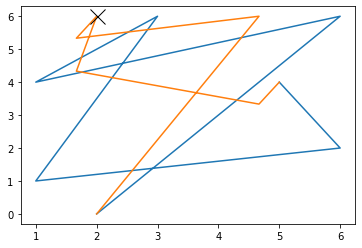

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys


# weight vectors
w = np.array([[2.0,0.0],[6.0,6.0],[1.0,4.0],[3.0,6.0],[1.0,1.0],[6.0,2.0],[5.0,4.0]])
plt.plot(w[:,0],w[:,1])
#plt.show()

eta = 1
input=[2,6]

# dictionary for storing the euclidean distances
eucl_dis = []

curr_min_dis = sys.maxsize
curr_min_idx = -1
for i in range(7):
  dis = math.sqrt((input[0] - w[i][0])**2 + (input[1] - w[i][1]) ** 2)
  eucl_dis.append(dis)
  if (dis<curr_min_dis):
    curr_min_dis = dis
    curr_min_idx = i

print("Euclidean distances:", eucl_dis)
print("Index:",curr_min_idx)

# assigning H values to neighbors as per problem description
h=[0]*7
h[curr_min_idx] =1
h[curr_min_idx+1] = 2/3
h[curr_min_idx-1] = 2/3
h[curr_min_idx+2] = 1/3
h[curr_min_idx-2] = 1/3


# updating the weights
for i in range(7):
  w[i]+=eta*h[i]*(input-w[i])

plt.plot(w[:,0],w[:,1])
plt.plot([2], [6], marker='x', color="black", markersize=15)

**Problem 8 (Written: 10pts)**

(1) In radial basis function networks, among (a) the RBF units, (b) output units, and (c) RBF-to-output connections, which part is associated the most with  "local" in "local learning"? Explain why. [5pt]

(2) In radial basis function networks, among (a) parameters of the RBF units (center and variance) and (b) RBF-to-output connection weights, which one can be learned in one-shot, without many iterations? Explain why. [5pt] 

(1) **Option A - RBF Units** 

In local learning, the RBF modules are typically linked to local. An RBF activation function can be connected to each input in the input space. It is possible to connect the input to the strongest local RBF activation function in this way. Due to the fact that each RBF unit only makes up a small piece of the network and that its centers and spreads may all be affected by various inputs, each unit learns locally and exhibits a unique behavior. Spread is what standard deviation is all about.

(2) **Option B - RBF-to-output connection weights**

RBF-to-output connections weights can be learned in a single step without requiring numerous iterations because the last layer (output) is a linear layer and hence we may learn these weights using pseudo inverse. Examining the RBF network with predicted values for cluster m and radius s along with inputs from $x$ to $p$ is a good idea. The pseudo inverse can be used to calculate p to output weights w in a single step where output units are typically linear units. In this instance, there are n RBF activation values. Each input vector, each H RBF unit, and each m output unit work together to provide the RBF activation values for each row in P.

1.   $n=H$, hence P is a square matrix and we multiply $P^{-1}$ on both the sides to obtain the following equation

    $$w = P^{-1}y$$

2.   $n>H$, means P is not a square matrix and we use psuedo inverse to calculate $w$. Multiply $(P^{T}P)^{-1}P^{T}$ on both sides

    $$(P^{T}P)^{-1}P^{T}Pw = (P^{T}P)^{-1}P^{T}y$$

    We know that $$(P^{T})^{-1}P^{T} = I = P^{-1}P$$

    $$P^{-1}(P^{T})^{-1}P^{T}Pw = (P^{T}P)^{-1}P^{T}y$$

    $$P^{-1}Pw = (P^{T}P)^{-1}P^{T}y$$

    $$w = (P^{T}P)^{-1}P^{T}y$$

Weights can be calculated using this formula in a single step without the need for iterations.